E-bikes were introduced in 2020.08, so now we have three years' worth of data (thru 2023.07).

How have e-bikes changed the bike usage patterns in Chicago?

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
dataDir = '/home/alp/Google Drive/Python/DataSets/Data_Divvy/CVS_archive/'

import glob
file_names = sorted(glob.glob(dataDir+'Divvy*.csv'))

# since i've worked with this data before, let's just import the cols I want, rather than loading them all and deleting them
cols = ['rideable_type','started_at','ended_at','start_station_id','end_station_id','start_lat','start_lng','end_lat','end_lng','member_casual']

data = pd.read_csv('/home/alp/Google Drive/Python/DataSets/Data_Divvy/CVS_archive/202008-divvy-tripdata.csv',
                    parse_dates = [2,3],usecols=cols)
# initialize DF with first month's data

#cycle through each year getting the data
year = 2020
for month in range(9,13):
    file = f"{dataDir}{year}{month:02d}-divvy-tripdata.csv"
    newData = pd.read_csv(file,parse_dates=[2,3],usecols=cols)
    data = pd.concat([data,newData])
    print(f'reading{file}')

for year in range(2021,2023):
    for month in range(1,13):
        file = f"{dataDir}{year}{month:02d}-divvy-tripdata.csv"
        newData = pd.read_csv(file,parse_dates=[2,3],usecols=cols)
        data = pd.concat([data,newData])
        print(f'reading{file}')

year = 2023
for month in range(1,8):
    file = f"{dataDir}{year}{month:02d}-divvy-tripdata.csv"
    newData = pd.read_csv(file,parse_dates=[2,3],usecols=cols)
    data = pd.concat([data,newData])
    print(f'reading{file}')

# add month and year cols to facilitate analysis
data['month'] = pd.DatetimeIndex(data['started_at']).month
data['year'] = pd.DatetimeIndex(data['started_at']).year

# divvy changes its terminology periodically; I think 'classic_bike' = 'docked_bike', so let's consolidate the terms
# this should be checked in the 2023 data
data['rideable_type'].replace(to_replace = 'docked_bike', value = 'classic_bike',inplace = True)



In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16356150 entries, 0 to 767649
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   rideable_type     object        
 1   started_at        object        
 2   ended_at          datetime64[ns]
 3   start_station_id  object        
 4   end_station_id    object        
 5   start_lat         float64       
 6   start_lng         float64       
 7   end_lat           float64       
 8   end_lng           float64       
 9   member_casual     object        
 10  month             int64         
 11  year              int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 1.6+ GB


In the 36 months since e-bikes were introduced, there have been 16.3 million bike rides in chicago.

Let's look at how popular e-bikes have become.

Text(0.5, 1.0, 'Number of bike rides per month')

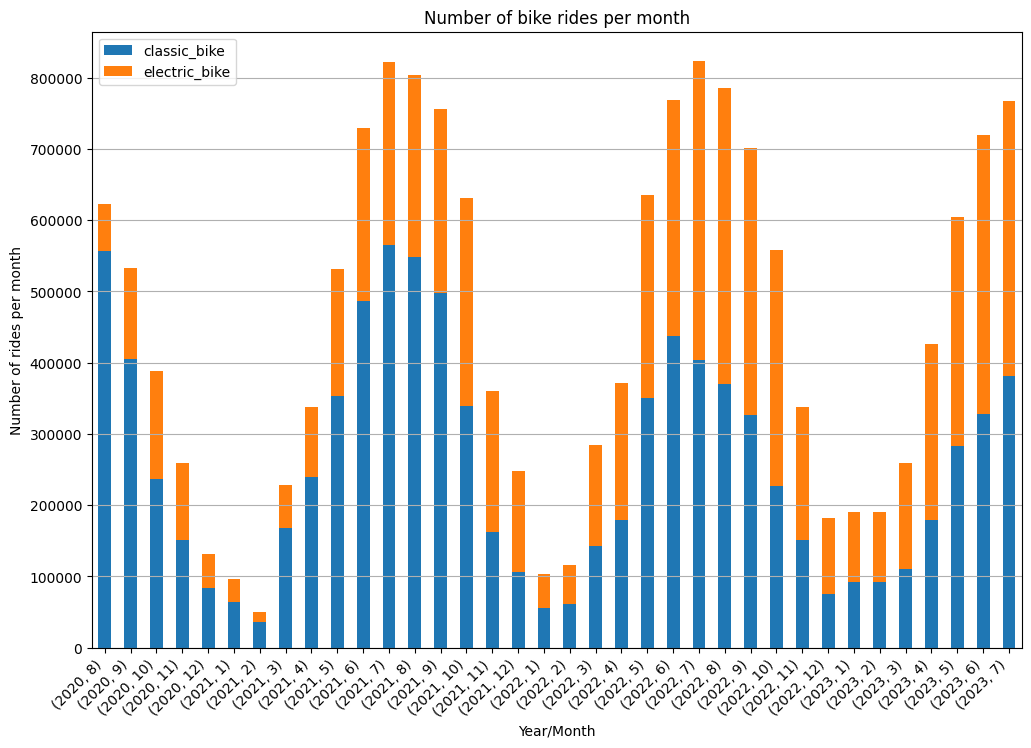

In [31]:
# first calculate the total number of different types of bike rides taken since e-bikes introduced
plt.rcParams['figure.figsize']=(12,8)

graphData = pd.crosstab([data.rideable_type],[data.year,data.month],
                        values=data.started_at,aggfunc = 'count').T
graphData.plot(kind='bar',stacked = True).legend(loc = 'upper left')
plt.xticks(rotation=45,horizontalalignment = 'right')
plt.xlabel('Year/Month')
#plt.yticks(np.arange(0,1.1,.25))
plt.ylabel('Number of rides per month')
plt.grid(axis='y')
plt.title("Number of bike rides per month")

This graph shows a very clear (and unsurprings) seasonal pattern to bike rides. In Jan/feb, ridership is very low; in Dec/Mar it's low; and the rest of the year it is robust.

What percent of these rides is being done on ebikes?

Text(0.5, 1.0, 'Change in type of bikes ridden per month')

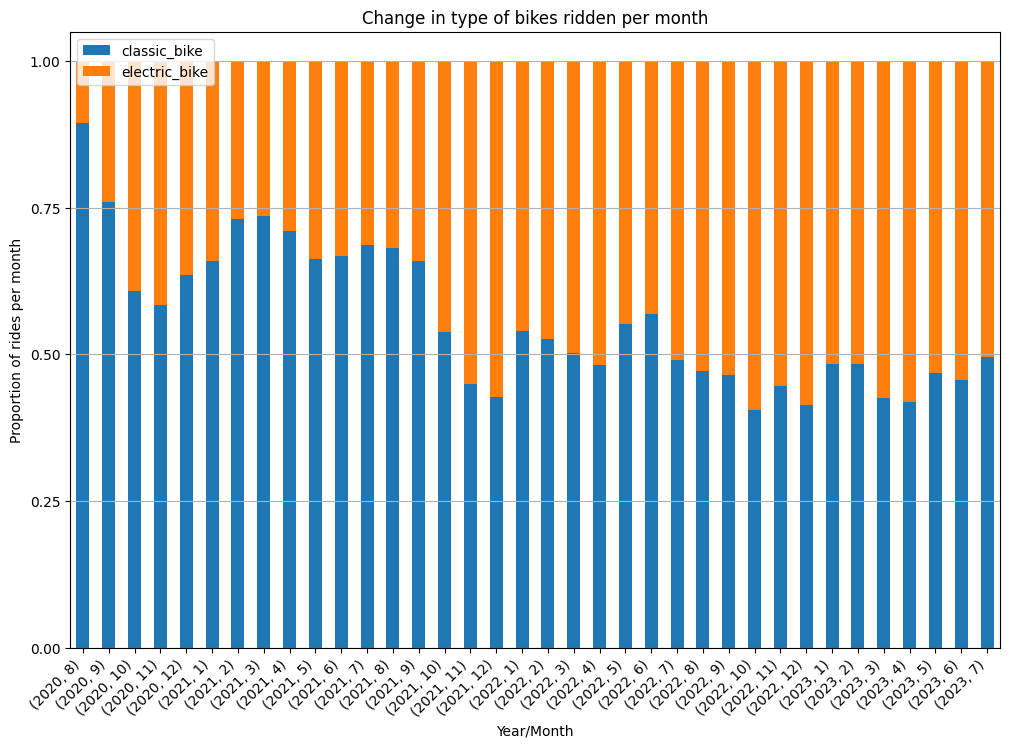

In [32]:
# let's print this in a normalized graph
graphData = pd.crosstab([data.rideable_type],[data.year,data.month],
                        values=data.started_at,aggfunc = 'count', normalize = 'columns').T
graphData.plot(kind='bar',stacked = True).legend(loc = 'upper left')
plt.xticks(rotation=45,horizontalalignment = 'right')
plt.xlabel('Year/Month')
plt.yticks(np.arange(0,1.1,.25))
plt.ylabel('Proportion of rides per month')
plt.grid(axis='y')
plt.title("Change in type of bikes ridden per month")

Text(0.5, 1.0, 'Change in type of bikes ridden per month')

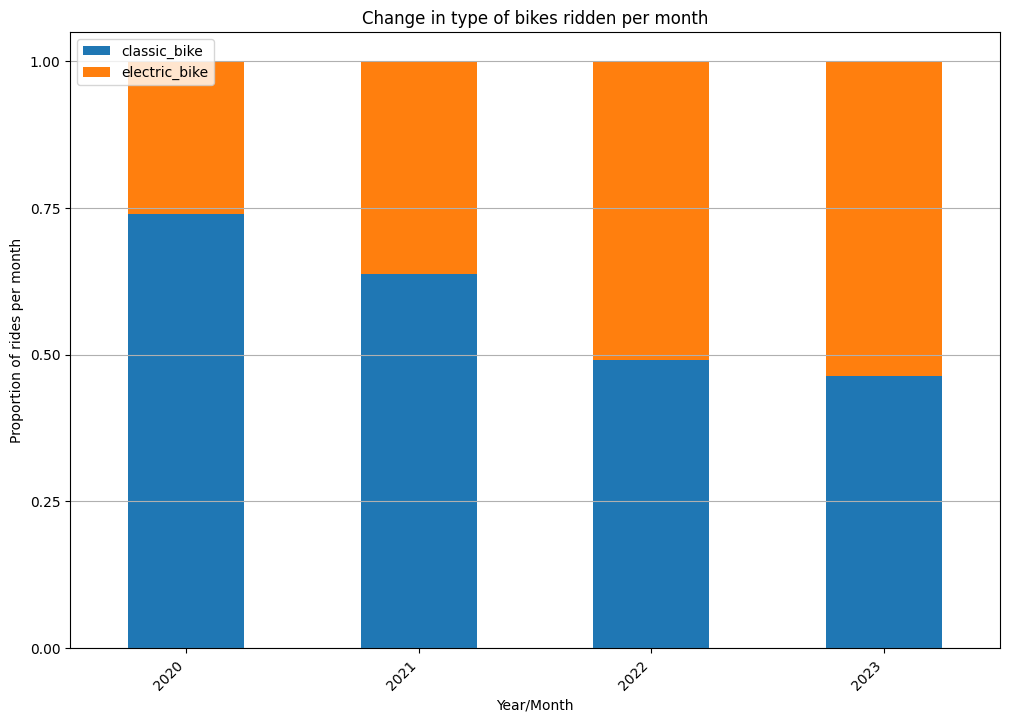

In [33]:
# let's print this in a normalized graph
graphData = pd.crosstab([data.rideable_type],[data.year],
                        values=data.started_at,aggfunc = 'count', normalize = 'columns').T
graphData.plot(kind='bar',stacked = True).legend(loc = 'upper left')
plt.xticks(rotation=45,horizontalalignment = 'right')
plt.xlabel('Year/Month')
plt.yticks(np.arange(0,1.1,.25))
plt.ylabel('Proportion of rides per month')
plt.grid(axis='y')
plt.title("Change in type of bikes ridden per month")

Have e-bikes changed the membership types of the rides?

Text(0.5, 1.0, 'Change in type of bikes ridden per month')

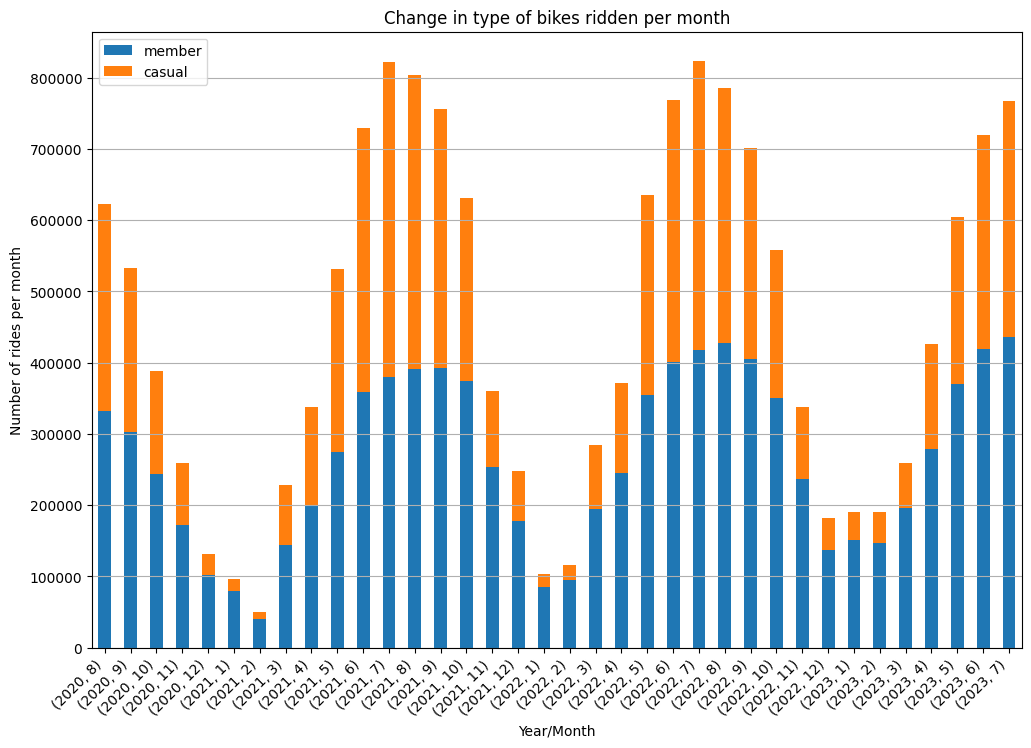

In [34]:
# did the introduction of e-bikes change the number of people who joined Divvy as members?
graphData = pd.crosstab([data.member_casual],[data.year,data.month],
                        values=data.started_at,aggfunc = 'count').T
                        
# the crosstab puts cols in alpha order; let's change this so 'member' is on bottom
graphData = graphData[['member','casual']]

graphData.plot(kind='bar',stacked = True).legend(loc = 'upper left')
plt.xticks(rotation=45,horizontalalignment = 'right')
plt.xlabel('Year/Month')
#plt.yticks(np.arange(0,1.1,.25))
plt.ylabel('Number of rides per month')
plt.grid(axis='y')
plt.title("Change in type of bikes ridden per month")

Text(0.5, 1.0, 'Change in type of bikes ridden per month')

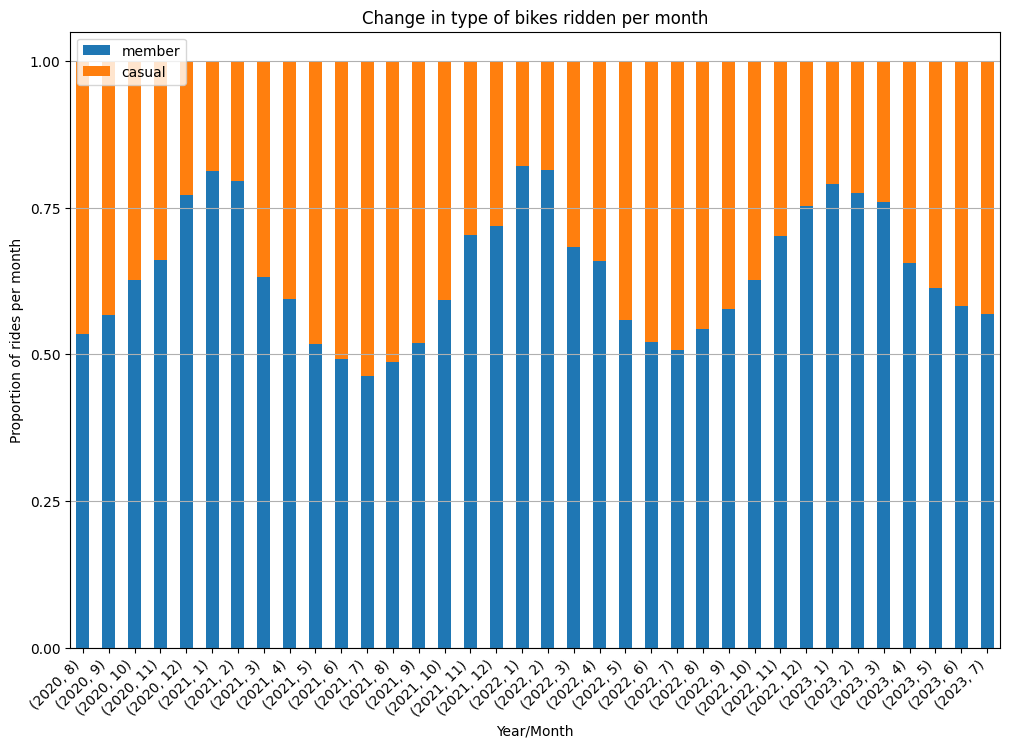

In [35]:
# did the introduction of e-bikes change the number of people who joined Divvy as members?
graphData = pd.crosstab([data.member_casual],[data.year,data.month],
                        values=data.started_at,aggfunc = 'count', normalize = 'columns').T

# the crosstab puts cols in alpha order; let's change this so 'member' is on bottom
graphData = graphData[['member','casual']]

graphData.plot(kind='bar',stacked = True).legend(loc = 'upper left')
plt.xticks(rotation=45,horizontalalignment = 'right')
plt.xlabel('Year/Month')
plt.yticks(np.arange(0,1.1,.25))
plt.ylabel('Proportion of rides per month')
plt.grid(axis='y')
plt.title("Change in type of bikes ridden per month")